# <center>PROYECTO INTELIGENCIA ARTIFICIAL </center>

# ANALISIS DE SUICIDIOS A NIVEL MUNDIAL Y NACIONAL

<img src="banner_mundial.jpeg" style="width:100%;">


## INTEGRANTES

**DANIELA QUINTERO LEON - 2161635**

**MARTHA ELIANA ARENAS MARQUEZ - 2162042**

**CARLOS DANIEL BARRERA MANRIQUE - 2162061**

In [10]:
from IPython.display import HTML
import random
def ocultar(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Mostrar/Ocultar'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
ocultar()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
pd.__version__
g= ! pip install seaborn
ocultar()

## Dataset traido desde kaggle: 
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [12]:
d= pd.read_csv("master.csv")
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Tratamiento de datos

In [13]:
d["generation"].unique()
# Codigo para cada generacion
d.generation = d.generation.replace({"Generation X": 0, "Silent": 1, "Boomers": 2, "Millenials": 3, "Generation Z": 4, "G.I. Generation": 5})

#Codigo para el sexo
d.sex=d.sex.replace({"male":0, "female": 1})

#Codigo para cada rango de edad
d.age=d.age.replace({"15-24 years":1 , "35-54 years":3 ,"75+ years":5 ,"25-34 years":2 ,"55-74 years":4 ,"5-14 years":0})

d[" gdp_for_year ($) "].unique()
names = d.columns.tolist()
names[names.index(' gdp_for_year ($) ')] = 'gdp_for_year'
names[names.index('gdp_per_capita ($)')] = 'gdp_per_capita'
names[names.index('suicides/100k pop')] = 'suicides_100'
names[names.index('country-year')] = 'countryear'
d.columns = names

#Eliminacion de las columnas innecesarias
d.drop(['HDI for year'], axis='columns', inplace=True)
d.drop(['gdp_for_year'], axis='columns', inplace=True)
d.drop(['gdp_per_capita'], axis='columns', inplace=True)
d= d[['country','year','sex','age','suicides_no','population','suicides_100','generation']]

#Asignar un codigo para cada pais
d.country=d.country.replace({'Albania':0,'Antigua and Barbuda':1,'Argentina':2, 'Armenia':3, 'Aruba':4,
       'Australia':5, 'Austria':6, 'Azerbaijan':7, 'Bahamas':8, 'Bahrain':9,
       'Barbados':10, 'Belarus':11, 'Belgium':12, 'Belize':13,
       'Bosnia and Herzegovina':14, 'Brazil':15, 'Bulgaria':16, 'Cabo Verde':17,
       'Canada':18, 'Chile':19, 'Colombia':20, 'Costa Rica':21, 'Croatia':22, 'Cuba':23,
       'Cyprus':24, 'Czech Republic':25, 'Denmark':26, 'Dominica':27, 'Ecuador':28,
       'El Salvador':29, 'Estonia':30, 'Fiji':31, 'Finland':32, 'France':33, 'Georgia':34,
       'Germany':35, 'Greece':36, 'Grenada':37, 'Guatemala':38, 'Guyana':39, 'Hungary':40,
       'Iceland':41, 'Ireland':42, 'Israel':43, 'Italy':44, 'Jamaica':45, 'Japan':46,
       'Kazakhstan':47, 'Kiribati':48, 'Kuwait':49, 'Kyrgyzstan':50, 'Latvia':51,
       'Lithuania':52, 'Luxembourg':53, 'Macau':54, 'Maldives':55, 'Malta':56,
       'Mauritius':57, 'Mexico':58, 'Mongolia':59, 'Montenegro':60, 'Netherlands':61,
       'New Zealand':62, 'Nicaragua':63, 'Norway':64, 'Oman':65, 'Panama':66, 'Paraguay':67,
       'Philippines':68, 'Poland':69, 'Portugal':70, 'Puerto Rico':71, 'Qatar':72,
       'Republic of Korea':73, 'Romania':74, 'Russian Federation':75,
       'Saint Kitts and Nevis':76, 'Saint Lucia':77,
       'Saint Vincent and Grenadines':78, 'San Marino':79, 'Serbia':80,
       'Seychelles':81, 'Singapore':82, 'Slovakia':83, 'Slovenia':84, 'South Africa':85,
       'Spain':86, 'Sri Lanka':87, 'Suriname':88, 'Sweden':89, 'Switzerland':90,
       'Thailand':91, 'Trinidad and Tobago':92, 'Turkey':93, 'Turkmenistan':94,
       'Ukraine':95, 'United Arab Emirates':96, 'United Kingdom':97,
       'United States':98, 'Uruguay':99, 'Uzbekistan':100 })

In [14]:
#Cambio del tipo de datos(todos a tipo float)
d['year']=d['year'].astype(np.float64)
d['sex']=d['sex'].astype(np.float64)
d['country']=d['country'].astype(np.float64)
d['age']=d['age'].astype(np.float64)
d['suicides_no']=d['suicides_no'].astype(np.float64)
d['population']=d['population'].astype(np.float64)
d['generation']=d['generation'].astype(np.float64)
d['suicides_100']=d['suicides_100'].astype(np.float64)

d = d.sample(frac=1).reset_index(drop=True)
d=d.sort_values(by='suicides_no')
edad=d.values[:,4]

In [15]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 18087 to 6035
Data columns (total 8 columns):
country         27820 non-null float64
year            27820 non-null float64
sex             27820 non-null float64
age             27820 non-null float64
suicides_no     27820 non-null float64
population      27820 non-null float64
suicides_100    27820 non-null float64
generation      27820 non-null float64
dtypes: float64(8)
memory usage: 1.9 MB


In [16]:
d.describe()

,country,year,sex,age,suicides_no,population,suicides_100,generation
count,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,49.275270,2001.258375,0.500000,2.502876,242.574407,1.844794e+06,12.816097,1.922214
std,29.372538,8.469055,0.500009,1.706730,902.047917,3.911779e+06,18.961511,1.566294
min,0.000000,1985.000000,0.000000,0.000000,0.000000,2.780000e+02,0.000000,0.000000
25%,24.000000,1995.000000,0.000000,1.000000,3.000000,9.749850e+04,0.920000,1.000000
50%,47.000000,2002.000000,0.500000,3.000000,25.000000,4.301500e+05,5.990000,2.000000
75%,74.000000,2008.000000,1.000000,4.000000,131.000000,1.486143e+06,16.620000,3.000000
max,100.000000,2016.000000,1.000000,5.000000,22338.000000,4.380521e+07,224.970000,5.000000


### Creacion de una nueva caracteristica "CAUSA DE MUERTE"

In [17]:
n1=0
n2=0
n3=0
n4=0
for i in range(len(edad)):
    if edad[i]>=0 and edad[i]<3584:
        n1 = n1+1      
    if(edad[i]>3584 and edad[i]<10168):
        n2 = n2+1   
    if(edad[i]>10168 and edad[i]<16752):      
        n3 = n3+1      
    if(edad[i]>16753 and edad[i]<22339):
        n4 = n4+1

ocultar()

### Causas:

#### *ASFIXIA* - 0
#### *CORTO-PUNZANTE* -1
#### *TOXICOS* -2
#### *CAUSTICO* -3

In [18]:
        
    #LA CAUSA SE ASIGNO SEGUN EL RANGO DE EDAD
        edad1=[]
        n1 = np.zeros(int(27513*0.19))
        n2 = np.ones(int(27513*0.4))
        n3 = np.ones(int(27513*0.114))*2
        n4 = np.ones(int(27513*0.3))*3
        nl1=np.concatenate((n1,n2,n3,n4), axis=0)
        ##########
        n1 = np.zeros(int(268*0.19))
        n2 = np.ones(int(268*0.2))
        n3 = np.ones(int(268*0.115))*2
        n4 = np.ones(int(268*0.14))*3
        nl2=np.concatenate((n1,n2,n3,n4), axis=0)
        n1 = np.zeros(int(27*0.4))
        n2 = np.ones(int(27*0.1))
        n3 = np.ones(int(27*0.17))*2
        n4 = np.ones(int(27*0.1))*3
        nl3=np.concatenate((n1,n2,n3,n4), axis=0)
        n1 = np.zeros(int(12*0.73))
        n2 = np.ones(int(12*0.22))
        n3 = np.ones(int(12*0.15))*2
        n4 = np.ones(int(12*0.01))*3
        nl4=np.concatenate((n1,n2,n3,n4), axis=0)

edad=np.concatenate((nl1,nl2,nl3,nl4))
d['causa']=edad

In [19]:
d.head()

,country,year,sex,age,suicides_no,population,suicides_100,generation,causa
18087,77.0,2010.0,1.0,4.0,0.0,10814.0,0.0,1.0,0.0
19159,4.0,2003.0,1.0,5.0,0.0,1580.0,0.0,1.0,0.0
5062,60.0,2002.0,1.0,0.0,0.0,43461.0,0.0,3.0,0.0
5060,9.0,1999.0,0.0,5.0,0.0,2522.0,0.0,5.0,0.0
5059,81.0,2007.0,1.0,4.0,0.0,4383.0,0.0,1.0,0.0


## Analisis de  caracteristicas generales

## Matriz de co-rrelación

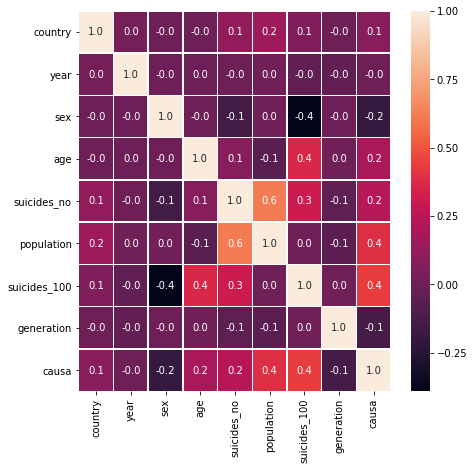

In [20]:
f, ax = plt.subplots(figsize=(7,7))
import seaborn as sns
sns.heatmap(d.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ocultar()

## Analisis de datos segun el numero de suicidios

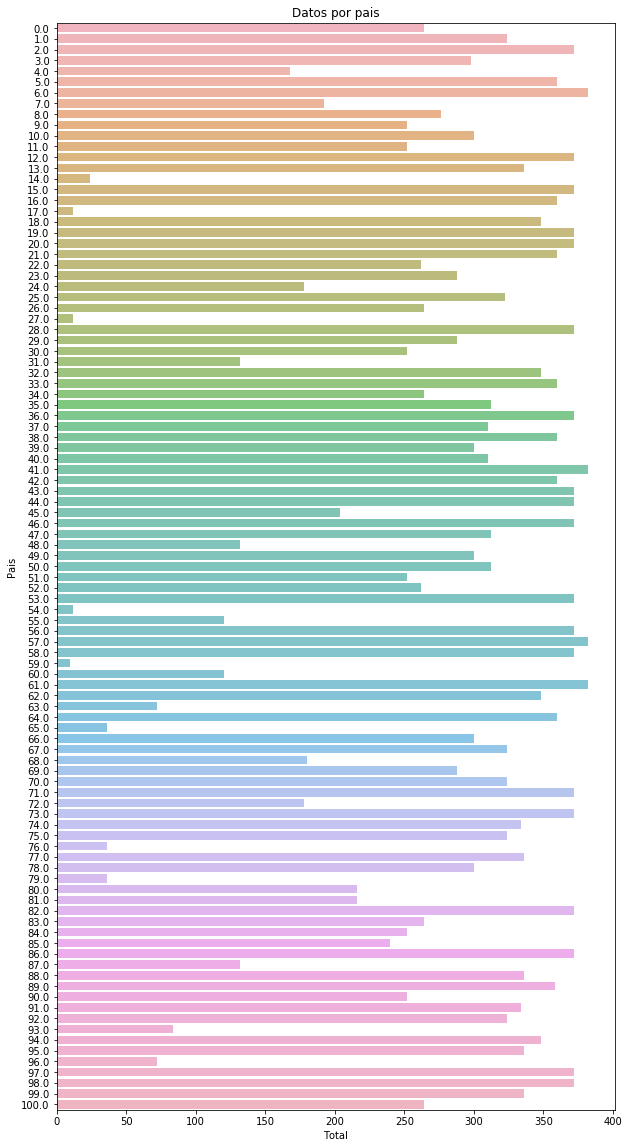

In [24]:
import seaborn as sns
alpha = 0.7
plt.figure(figsize=(10,20))
sns.countplot(y='country', data=d, alpha=alpha)
plt.title('Datos por pais')
plt.ylabel('Pais')
plt.xlabel('Total')
plt.show()
ocultar()

## Numero de siucidios de acuerdo al pais

##### Nota: Paises con mayor numero de suicidios:
- RUSIA
- ESTADOS UNIDOS
- JAPON
- GRECIA
- ALEMANIA
- BRAZIL

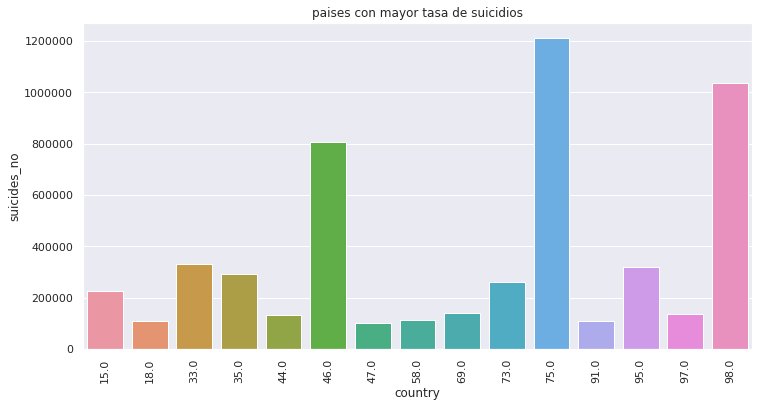

In [31]:
country_suicides = country_suicides.reset_index().sort_values(by='suicides_no', ascending=False)
top15 = country_suicides[:15]
sns.barplot(x='country', y='suicides_no', data=top15).set_title('paises con mayor tasa de suicidios')
plt.xticks(rotation=90)
ocultar()

##### Nota: Paises con menor numero de suicidios:
- REPUBLICA DOMINICANA
- SAN CRISTOBAL Y NIEVES
- SAN MARINO
- ANTIGUA Y BARBUDA
- MALVINAS
- MACACO

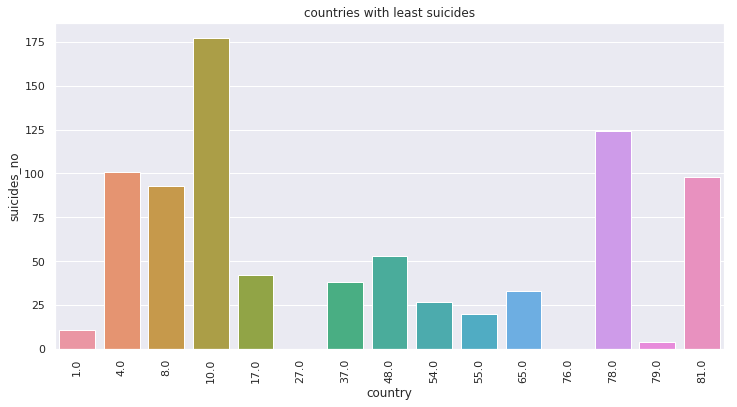

In [32]:
bottom15 = country_suicides[-15:]
sns.barplot(x='country', y='suicides_no', data=bottom15).set_title('countries with least suicides')
plt.xticks(rotation=90)
ocultar()

## Analizando caracteristicas de acuerdo a la generacion

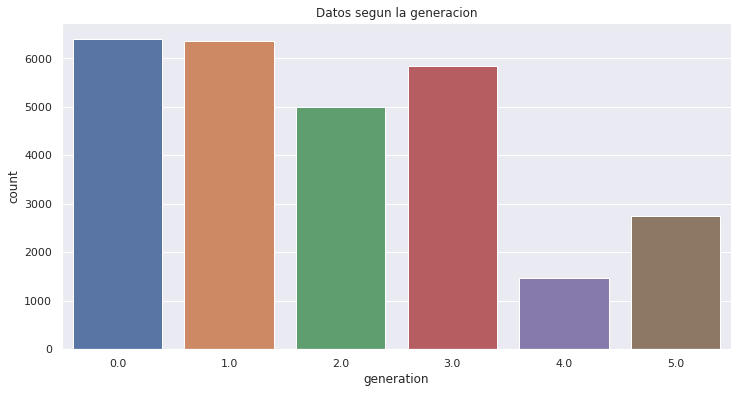

In [35]:
grid = sns.countplot(x='generation', data=d)
grid = plt.setp(grid.get_xticklabels(), rotation=360)
plt.title('Datos segun la generacion')
ocultar()

#### Conclusion:
##### Las generacion con mayor tasa de suicidios son:
- Generacion X (1961-1979)
- Boomers (1945-1964)

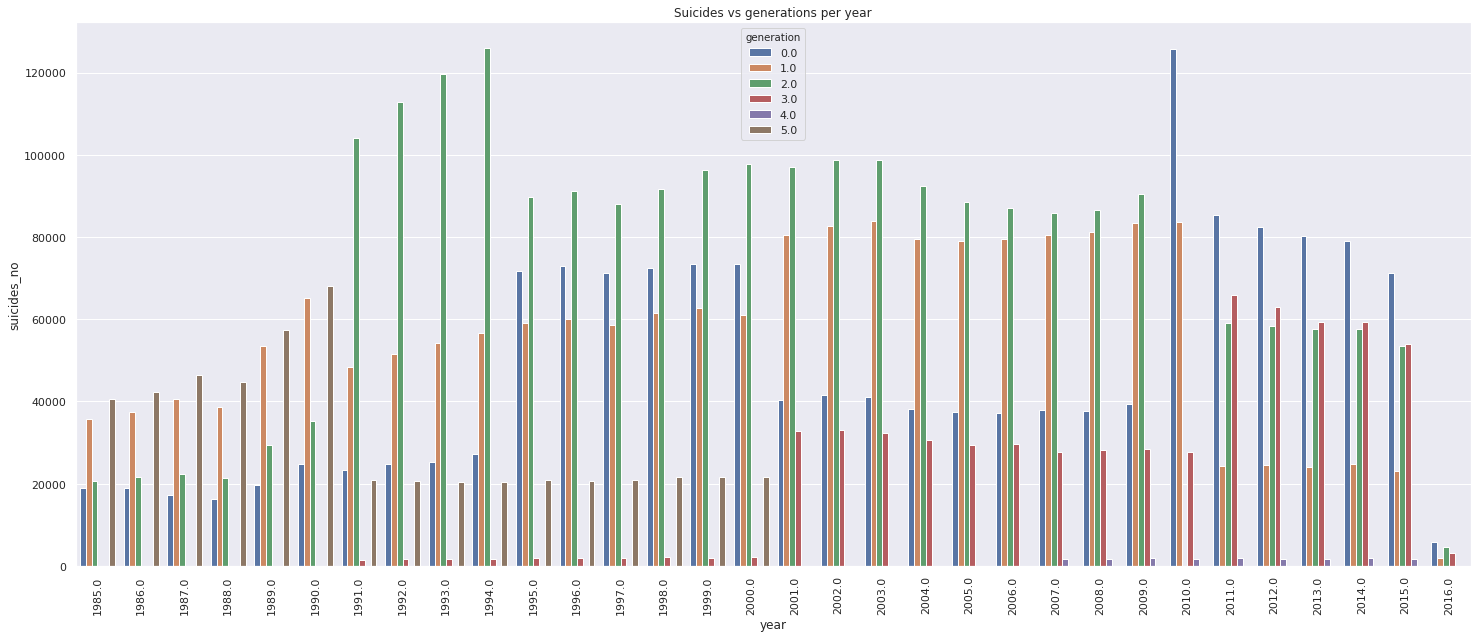

In [36]:
gen_year = d[['suicides_no','generation','year']].groupby(['generation','year']).sum().reset_index()
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(4,3)})
plt.xticks(rotation=90)
sns.barplot(y='suicides_no', x='year', hue='generation', data=gen_year, palette='deep').set_title('Suicides vs generations per year')
ocultar()

## ANALISIS POR GENERO

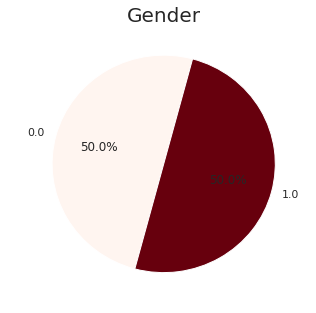

In [37]:
color = plt.cm.Reds(np.linspace(0, 1, 2))
d['sex'].value_counts().plot.pie(colors = color, figsize = (5, 5), startangle = 75, autopct='%1.1f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.show()
ocultar()

### Mayor tasa de suicidios de hombres respecto a las muejeres

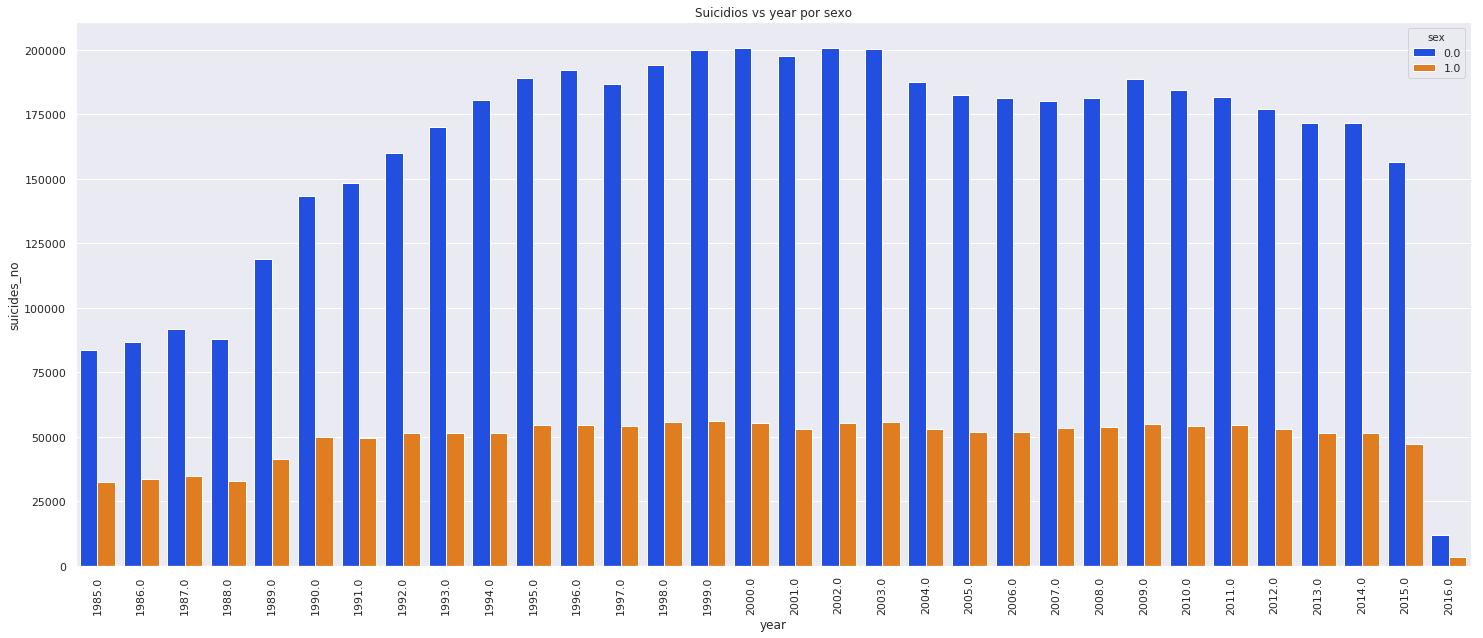

In [46]:
gen_year = d[['suicides_no','sex','year']].groupby(['sex','year']).sum().reset_index()
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(4,3)})
plt.xticks(rotation=90)
sns.barplot(y='suicides_no', x='year', hue='sex', data=gen_year, palette='bright').set_title('Suicidios vs year por sexo')
ocultar()

# <center> ¿CUAL FUE LA CAUSA DEL SUICIDIO?</center>

## Utilizando metodos de clasificacion

**Clasificacion según la causa del suicidio**

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

def tpr(estC,X,y):
    p = estC.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(estC,X,y):
    p = estC.predict(X)
    return np.mean(p[y==0] == y[y==0])
ocultar()

## Gausian Navie Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X = d.values[:,[0,1,2,3,4,5,6,7]]
y = d.values[:,8]
y=y.astype('int')
est = GaussianNB()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy:                                 %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.2)
est.fit(Xtr,ytr)
print "Score(Partiendo Xtrain y Xtest):          %.3f" % est.score(Xts,yts)
st = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr                                       %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr                                       %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy:                                 0.488 (+/- 0.00886)
Score(Partiendo Xtrain y Xtest):          0.499
tpr                                       0.974 (+/- 0.00374)
tnr                                       0.488 (+/- 0.00886)


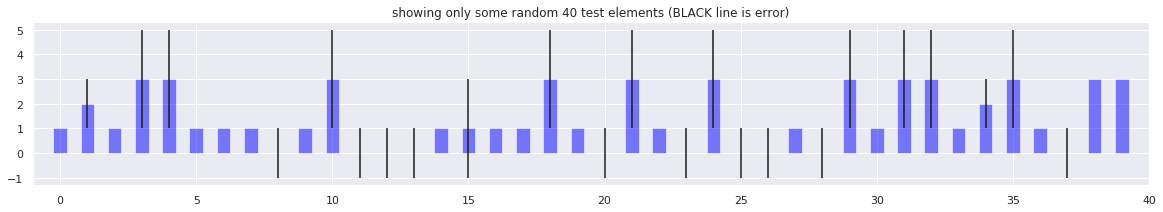

In [49]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))
ocultar()

## Metodo RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
estC = RandomForestClassifier()
sC = cross_val_score(estC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy:                                    %.3f (+/- %.5f)"%(np.mean(sC), np.std(sC))
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.2)
estC.fit(Xtr,ytr)
print "Score(Partiendo Xtrain y Xtest):             %.3f"%estC.score(Xts,yts)
sC = cross_val_score(estC, X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy(KFold=4):                           %.3f (+/- %.5f)"%(np.mean(sC), np.std(sC))
st = cross_val_score(estC, X, y, cv=KFold(4, shuffle=True), scoring=tpr)
print "tpr                                          %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(estC, X, y, cv=KFold(4, shuffle=True), scoring=tnr)
print "tnr                                          %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))

ocultar()

accuracy:                                    0.973 (+/- 0.00229)
Score(Partiendo Xtrain y Xtest):             0.975
accuracy(KFold=4):                           0.973 (+/- 0.00247)
tpr                                          0.960 (+/- 0.00534)
tnr                                          0.948 (+/- 0.00308)


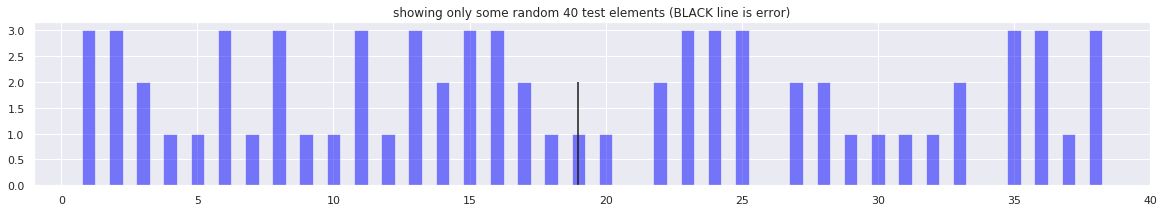

In [62]:
plt.figure(figsize=(20,3))
preds = estC.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))
ocultar()

## Metodo de decisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy            %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.2)
est.fit(Xtr,ytr)
print "Score:              %.3f" %est.score(Xts,yts)
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy (KFold=5): %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr                 %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr                 %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()


accuracy            0.971 (+/- 0.00272)
Score:              0.973
accuracy (KFold=5): 0.972 (+/- 0.00088)
tpr                 0.965 (+/- 0.00341)
tnr                 0.923 (+/- 0.01669)


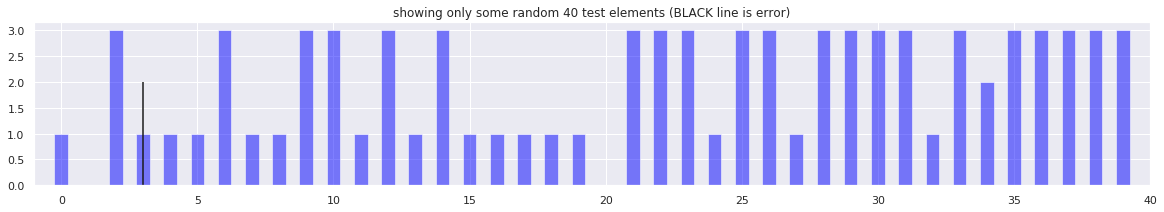

In [64]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))
ocultar()

## Probando diferentes metodos de sklearn diferentes a los de clase

### <span style="color:orange"> SDGClassifier: </span>

In [65]:
from sklearn.linear_model import SGDClassifier
y=y.astype('int')
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)  
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.357 (+/- 0.08259)


### <span style="color:orange">ExtraTreeClassifier:</span>

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier() 
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.955 (+/- 0.00217)


### <span style="color:orange"> KNeighborsClassifier: </span>

In [67]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier() 
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.592 (+/- 0.00687)


### <span style="color:orange"> RidgeClassifier: </span>

In [68]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier() 
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.573 (+/- 0.01048)


### <span style="color:orange"> StandardScaler: </span>

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler().fit(X_train)
Xn_train = normalizador.transform(X_train)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(Xn_train,y_train)
Xn_test = normalizador.transform(X_test)
knn.predict(Xn_test)
print "accuracy %.3f"% knn.score(Xn_test,y_test)
ocultar()

accuracy 0.783


##  Expansion del metodo Extra Tress Classifier

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier() 
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy           :%.3f (+/- %.5f)"%(np.mean(s), np.std(s))
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.2)
clf.fit(Xtr,ytr)
print "Score              :%.3f "% (clf.score(Xts,yts))
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr                :%.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr                :%.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy(KFold=4)  :%.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy           :0.953 (+/- 0.00367)
Score              :0.950 
tpr                :0.956 (+/- 0.00461)
tnr                :0.926 (+/- 0.01544)
accuracy(KFold=4)  :0.952 (+/- 0.00239)


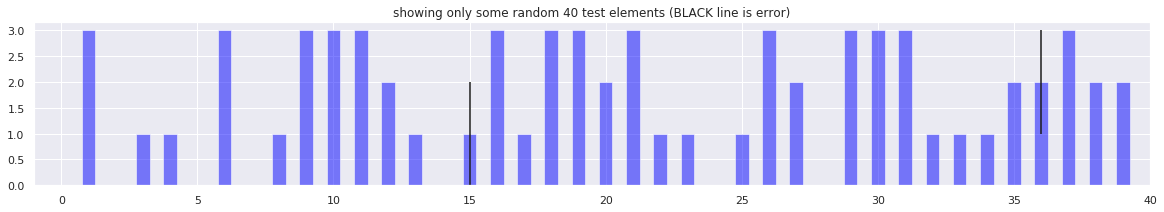

In [72]:
plt.figure(figsize=(20,3))
preds = clf.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))
ocultar()

## Utilizando PCA 

## Random Forest


In [74]:
from sklearn.decomposition import PCA
X1 = PCA(n_components=4).fit_transform(X)
s = cross_val_score(RandomForestClassifier(), X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy(KFold=10) :%.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(ExtraTreesClassifier(), X1, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy(KFold=4 ) :%.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy(KFold=10) :0.951 (+/- 0.00608)
accuracy(KFold=4 ) :0.952 (+/- 0.00184)


## ALGORITMOS NO SUPERVISADOS

In [76]:
from sklearn.datasets import *
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
ocultar()

#### Numero de suicidios vs la poblacion 
*N_cluster=4*

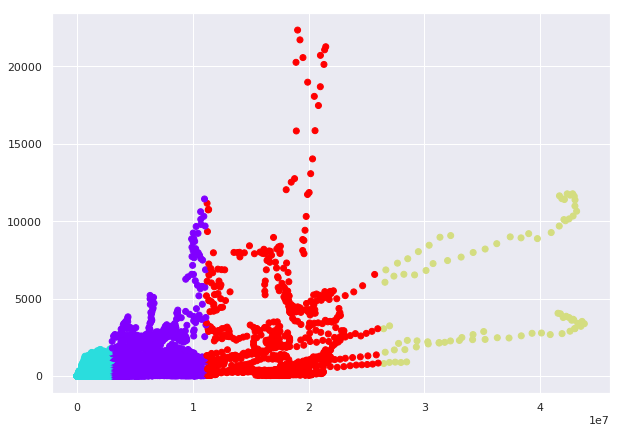

In [105]:
X = d.values[:,[0,1,2,3,4,5,6,7]]
y = d.values[:,7]
kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)
h1=X[:,4]
h2=X[:,5]
X1=h1.astype(int)
X2=h2.astype(int)
mn=kmeans.labels_[:]
plt.figure(figsize=(10,7))
plt.scatter(X2, X1, c=mn, cmap='rainbow')
ocultar()

In [147]:
predict=kmeans.predict(X)
yn=d.values[:,8]
g=yn[yn==predict]
print "accuracy %.3f "%((len(g)*100)/len(predict))

accuracy 27.000 


### Conclusion:
*Los clusters del Kmeans se ajustan un 27% con respecto a la caracteristica 'causa' de nuestros datos, lo que quiere decir que nuestros datos presentan mucho ruido, ya que estamos trabajando con 27mil datos y 8 caracteristicas*

### Año vs numero de suicidios
*N_clusters= 6*

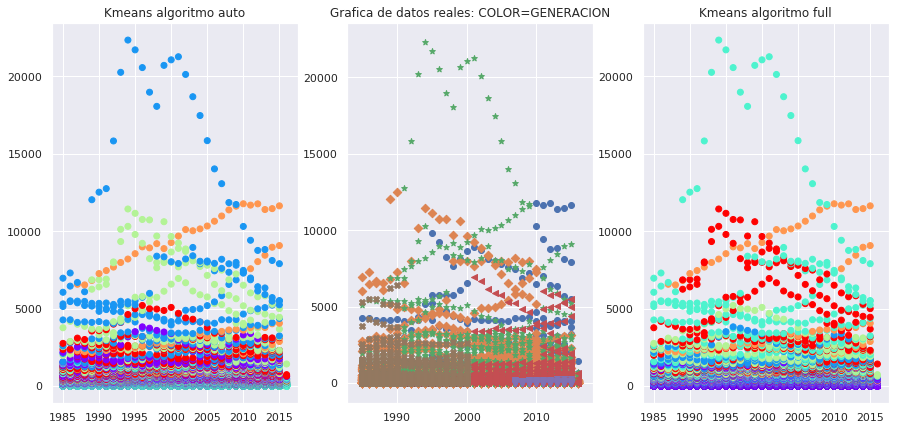

In [115]:
from matplotlib import pyplot as plt
plt.clf()
po=20759.284
po1=20999.284
plt.figure(figsize=(15,7))
for tipo,marca in zip(range(6),"oD*<vX"):
        plt.subplot(132)
        plt.scatter(X[:,1][y == tipo], 
                    X[:,4][y == tipo], 
                    marker=marca)
        plt.title('Grafica de datos reales: COLOR=GENERACION')

h1=X[:,4]
h2=X[:,1]
X1=h1.astype(int)
X2=h2.astype(int)
kmeans = KMeans(n_clusters=6)  
kmeans.fit(X) 
mn=kmeans.labels_[:]
plt.subplot(131)
plt.scatter(X2, X1, c=mn, cmap='rainbow')
plt.title('Kmeans algoritmo auto')
kmeans2 = KMeans(n_clusters=6, max_iter = 500, algorithm='full')  
kmeans2.fit(X)  
mn2=kmeans2.labels_[:]
plt.subplot(133)
plt.scatter(X2, X1, c=mn2, cmap='rainbow')
plt.title('Kmeans algoritmo full')
#plt.show()
ocultar()

#### COMPARACION ENTRE NUESTRO K_LABELS Y LA COLUMNA GENERACION

*Kmeans auto*

In [148]:
predict=kmeans.predict(X)
print "accuracy %.3f "%((po*100)/len(predict))
ocultar()

accuracy 74.620 


*Kmeans full*

In [149]:
predict=kmeans.predict(X)
print "accuracy %.3f "%((po1*100)/len(predict))
ocultar()

accuracy 75.483 


### Conclusion:
*Los clusters del Kmeans se ajustan un 75% con respecto a la caracteristica 'generacion' de nuestros datos, lo que quiere decir, que segun las caracteristicas de entrenamiento en el Kmeans, los patrones encontrados tienen un gran acierto con la generacion*